#  **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.

# **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying.

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

> 💡 **Note:** This section imports required libraries for data analysis.

In [1]:
# %pip install numpy pandas

In [2]:
# %pip install matplotlib seaborn

In [3]:
# %pip install scikit-learn

In [47]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown, Latex
from scipy import stats


#  **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

In [48]:
# load pew-raw.csv into a dataframe
pew_raw_df = pd.read_csv('data/pew-raw.csv')
display(pew_raw_df.describe())
display(pew_raw_df.head())

,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,134.200000,188.100000,223.000000,212.600000,193.200000,328.400000
std,205.433309,306.460601,370.235661,338.247838,308.833576,523.264794
min,1.000000,9.000000,7.000000,9.000000,10.000000,30.000000
25%,16.000000,19.500000,24.250000,24.250000,23.250000,40.750000
50%,23.500000,27.000000,33.500000,43.000000,34.000000,82.500000
75%,177.750000,191.500000,192.000000,198.750000,166.750000,201.500000
max,575.000000,869.000000,1064.000000,982.000000,881.000000,1486.000000


,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35


2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [49]:
# display rows 2 and 3 for the religion column
display(pew_raw_df.loc[2:3, 'religion']) 

# alternative way to display rows 2 and 3 for the religion column index (0-based index)
display(pew_raw_df.iloc[2:4, 0]) 

# display the first 5 rows of the dataframe
display(pew_raw_df.head()) 

# display the last 5 rows of the dataframe 
display(pew_raw_df.tail()) 


2    Buddhist
3    Catholic
Name: religion, dtype: object

2    Buddhist
3    Catholic
Name: religion, dtype: object

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35


,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


***What does not seem right in the above dataframe?***

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [50]:
pew_raw_df.melt(id_vars=['religion'], var_name='income_range', value_name='count')

,religion,income_range,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovahs Witness,<$10k,20
9,Jewish,<$10k,19


# **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [51]:
billboard_df = pd.read_csv('data/billboard.csv', encoding='latin-1')
billboard_df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Observe the first few rows of the dataset.

In [52]:
billboard_df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***What is wrong with the above dataset?***

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [53]:
# we will use regex to pick columns
import re

# pick columns with a regex pattern
week_cols = [c for c in billboard_df.columns
             if re.fullmatch(r'^x\d+(st|nd|rd|th)\.week$', c)]

df_long = billboard_df.melt(
    id_vars=[
        "year","artist.inverted","track","time","genre",
        "date.entered","date.peaked"
    ],
    value_vars=week_cols,
    var_name="week",
    value_name="rank"
)


# display the first 10 rows of the long format dataframe
display(df_long.head(10))


,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,x1st.week,59.0
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,x1st.week,83.0
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,x1st.week,63.0
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,x1st.week,77.0
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,x1st.week,81.0


If we inspect the current dataframe. We find that it is structured in a better way than before.

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

In [54]:
# extract week number as int
df_long["week"] = df_long["week"].str.extract(r'^x(\d+)').astype(int)

# inspect the cleaned up dataframe
df_long

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0
...,...,...,...,...,...,...,...,...,...
24087,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,76,NaN
24088,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,76,NaN
24089,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,76,NaN
24090,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,76,NaN


5. Now let's inspect the ***Week*** column in the dataframe.

In [55]:
df_long["week"]

0         1
1         1
2         1
3         1
4         1
         ..
24087    76
24088    76
24089    76
24090    76
24091    76
Name: week, Length: 24092, dtype: int64

Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.

*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*

To find the exact date when a song achieved the rank shown in each row, use the entry date plus the number of weeks elapsed (based on the week column). The rank is not used in the date calculation, it is only an attribute of that specific week. This is the fomula:

`chart_date = date.entered + timedelta(weeks = week - 1)`

***What is the problem with the calculation above?***

7. Let's only keep necessary columns

In [56]:
df_long = df_long.loc[:, ["artist.inverted", "track", "date.entered", "date.peaked", "week", "rank"]]
df_long

,artist.inverted,track,date.entered,date.peaked,week,rank
0,Destiny's Child,Independent Women Part I,2000-09-23,2000-11-18,1,78.0
1,Santana,"Maria, Maria",2000-02-12,2000-04-08,1,15.0
2,Savage Garden,I Knew I Loved You,1999-10-23,2000-01-29,1,71.0
3,Madonna,Music,2000-08-12,2000-09-16,1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),2000-08-05,2000-10-14,1,57.0
...,...,...,...,...,...,...
24087,Ghostface Killah,Cherchez LaGhost,2000-08-05,2000-08-05,76,NaN
24088,"Smith, Will",Freakin' It,2000-02-12,2000-02-12,76,NaN
24089,Zombie Nation,Kernkraft 400,2000-09-02,2000-09-02,76,NaN
24090,"Eastsidaz, The",Got Beef,2000-07-01,2000-07-01,76,NaN


8. How to rename your columns?

In [57]:
df_long.rename(columns={"artist.inverted": "arstist_inverted", "date.entered": "date_entered", "date.peaked": "date_peaked"}, inplace=True)
df_long

,arstist_inverted,track,date_entered,date_peaked,week,rank
0,Destiny's Child,Independent Women Part I,2000-09-23,2000-11-18,1,78.0
1,Santana,"Maria, Maria",2000-02-12,2000-04-08,1,15.0
2,Savage Garden,I Knew I Loved You,1999-10-23,2000-01-29,1,71.0
3,Madonna,Music,2000-08-12,2000-09-16,1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),2000-08-05,2000-10-14,1,57.0
...,...,...,...,...,...,...
24087,Ghostface Killah,Cherchez LaGhost,2000-08-05,2000-08-05,76,NaN
24088,"Smith, Will",Freakin' It,2000-02-12,2000-02-12,76,NaN
24089,Zombie Nation,Kernkraft 400,2000-09-02,2000-09-02,76,NaN
24090,"Eastsidaz, The",Got Beef,2000-07-01,2000-07-01,76,NaN


Display the dataframe

In [58]:
display(df_long)



Markdown('# The original dataframe shape is:\n   # **' + str(df_long.shape) + '**')

,arstist_inverted,track,date_entered,date_peaked,week,rank
0,Destiny's Child,Independent Women Part I,2000-09-23,2000-11-18,1,78.0
1,Santana,"Maria, Maria",2000-02-12,2000-04-08,1,15.0
2,Savage Garden,I Knew I Loved You,1999-10-23,2000-01-29,1,71.0
3,Madonna,Music,2000-08-12,2000-09-16,1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),2000-08-05,2000-10-14,1,57.0
...,...,...,...,...,...,...
24087,Ghostface Killah,Cherchez LaGhost,2000-08-05,2000-08-05,76,NaN
24088,"Smith, Will",Freakin' It,2000-02-12,2000-02-12,76,NaN
24089,Zombie Nation,Kernkraft 400,2000-09-02,2000-09-02,76,NaN
24090,"Eastsidaz, The",Got Beef,2000-07-01,2000-07-01,76,NaN


# The original dataframe shape is:
   # **(24092, 6)**

In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

In [59]:
# what if we want to drop rows with NaN in rank column
df_long = df_long.dropna(subset=["rank"])

# check the shape of the cleaned up dataframe
display(df_long)

Markdown('# After cleanup, the new dataframe shape is:\n   # **' + str(df_long.shape) + '**')

,arstist_inverted,track,date_entered,date_peaked,week,rank
0,Destiny's Child,Independent Women Part I,2000-09-23,2000-11-18,1,78.0
1,Santana,"Maria, Maria",2000-02-12,2000-04-08,1,15.0
2,Savage Garden,I Knew I Loved You,1999-10-23,2000-01-29,1,71.0
3,Madonna,Music,2000-08-12,2000-09-16,1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),2000-08-05,2000-10-14,1,57.0
...,...,...,...,...,...,...
19663,Lonestar,Amazed,1999-06-05,2000-03-04,63,45.0
19700,Creed,Higher,1999-09-11,2000-07-22,63,50.0
19980,Lonestar,Amazed,1999-06-05,2000-03-04,64,50.0
20017,Creed,Higher,1999-09-11,2000-07-22,64,50.0


# After cleanup, the new dataframe shape is:
   # **(5307, 6)**

# #   **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more

#   **Cars Data Set**

Start by reading the dataset related to car models: `data/cars.csv`

In [60]:
# read the data/cars.csv file into a dataframe
cars_df = pd.read_csv('data/cars.csv', sep=';')
cars_df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US


First Row seems to be the datatype, we need to remove it

In [61]:
# remove the first row
cars_df = cars_df.drop(index=0)
cars_df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


In [62]:
Markdown('# Shape of the Cars dataframe:\n   # **' + str(cars_df.shape) + '**')

# Shape of the Cars dataframe:
   # **(406, 9)**

Let's observe the columns with null values.  Either by using the `isnull().sum()` function

In [63]:
# check columns with null values
cars_df.isnull().sum()

Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64

There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

In [64]:
# check the percentage of null values in each column
null_percent = cars_df.isnull().mean() * 100
null_percent = null_percent.map(lambda x: f"{x:.2f}%")

# rename second column of null_percent series
null_percent.index.name = 'Column'
null_percent.name = 'Percentage of Null Values'


Markdown('# Percentage of null values in each column:')




# Percentage of null values in each column:

In [65]:
display(null_percent)

Column
Car             0.00%
MPG             0.74%
Cylinders       0.00%
Displacement    0.25%
Horsepower      0.49%
Weight          0.25%
Acceleration    0.00%
Model           0.00%
Origin          0.00%
Name: Percentage of Null Values, dtype: object

Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

In [66]:
# drop all the rows with any null values
cars_df_cleaned = cars_df.dropna()

In [67]:
cars_df_cleaned

Column,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US
7,Chevrolet Impala,14.0,8,454.0,220.0,4354.,9.0,70,US
8,Plymouth Fury iii,14.0,8,440.0,215.0,4312.,8.5,70,US
9,Pontiac Catalina,14.0,8,455.0,225.0,4425.,10.0,70,US
10,AMC Ambassador DPL,15.0,8,390.0,190.0,3850.,8.5,70,US
...,...,...,...,...,...,...,...,...,...
402,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,US
403,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,Europe
404,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,US
405,Ford Ranger,28.0,4,120.0,79.00,2625.,18.6,82,US


Let's observe how many columns we lost

In [68]:
Markdown('# Shape of the original Cars dataframe:\n   # **' + str(cars_df.shape) + '**')


# Shape of the original Cars dataframe:
   # **(406, 9)**

In [69]:
Markdown('# Shape of the cleaned up Cars dataframe after dropping rows with any null values:\n   # **' + str(cars_df_cleaned.shape) + '**')

# Shape of the cleaned up Cars dataframe after dropping rows with any null values:
   # **(401, 9)**

In [70]:
orginal_row_count = cars_df.shape[0]
cleaned_row_count = cars_df_cleaned.shape[0]
Markdown(f'# Number of rows dropped: **{orginal_row_count - cleaned_row_count}**')

# Number of rows dropped: **5**

Lets also check dropping the columns

`No column should be dropped. All provide meaningful information for:`

* `Predictive modeling`

* `Correlation analysis`

* `Trend comparisons`

`The only row we dropped is the first one, because it was metadata. We used this code to remove that row:`

`cars_df = cars_df.drop(index=0)`

However, let's try dropping columns by specifying a null value threshold:

In [71]:
# We can can drop columns with more than 0.5% null values:
threshold = 0.1  # percent
cars_dropped_df = cars_df.loc[:, cars_df.isnull().mean() * 100 <= threshold]
Markdown('# Shape of the Cars dataframe after dropping columns with more than ' + str(threshold) + '% null values:\n   # **' + str(cars_dropped_df.shape) + '**')
 

# Shape of the Cars dataframe after dropping columns with more than 0.1% null values:
   # **(406, 5)**

In [72]:
cars_dropped_df

Column,Car,Cylinders,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,8,12.0,70,US
2,Buick Skylark 320,8,11.5,70,US
3,Plymouth Satellite,8,11.0,70,US
4,AMC Rebel SST,8,12.0,70,US
5,Ford Torino,8,10.5,70,US
...,...,...,...,...,...
402,Ford Mustang GL,4,15.6,82,US
403,Volkswagen Pickup,4,24.6,82,Europe
404,Dodge Rampage,4,11.6,82,US
405,Ford Ranger,4,18.6,82,US


# **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `.

In [73]:
# fill the MPG column missing values with 0s
cars_df_filled = cars_df.copy()
cars_df_filled['MPG'] = cars_df_filled['MPG'].fillna(0.0)
cars_df_filled

Column,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,0.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,0.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US
...,...,...,...,...,...,...,...,...,...
402,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,US
403,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,Europe
404,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,US
405,Ford Ranger,28.0,4,120.0,79.00,2625.,18.6,82,US


However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

In [74]:
# Convert all columns except the first to numeric
cars_df_filled.iloc[:, 1:] = cars_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
cars_df_filled

Column,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.0,12.0,70,NaN
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.0,11.5,70,NaN
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.0,11.0,70,NaN
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,NaN
5,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,NaN
...,...,...,...,...,...,...,...,...,...
402,Ford Mustang GL,27.0,4,140.0,86.0,2790.0,15.6,82,NaN
403,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,NaN
404,Dodge Rampage,32.0,4,135.0,84.0,2295.0,11.6,82,NaN
405,Ford Ranger,28.0,4,120.0,79.0,2625.0,18.6,82,NaN


## Let's plot the MPG column

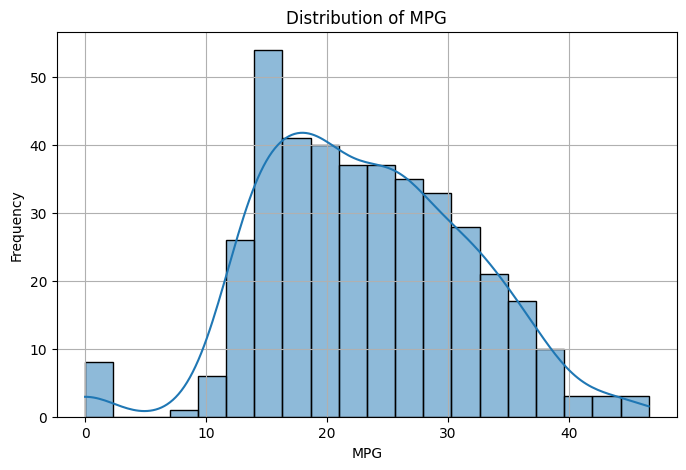

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to numeric if needed

cars_df_copy = cars_df_filled.copy()

cars_df_copy['MPG'] = pd.to_numeric(cars_df_copy['MPG'], errors='coerce')

# Plot histogram with KDE (density curve)
plt.figure(figsize=(8, 5))
sns.histplot(cars_df_copy['MPG'].dropna(), bins=20, kde=True)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

We can observe that:

* The MPG distribution is right-skewed (long tail to the right).

* Most values cluster between 15 and 30 MPG.

* The tail on the right shows fewer high-MPG cars (up to ~45).

This means that the `median` is a better choice for imputation since it is more robust to skewed data and outliers.

In [76]:
cars_mpg_median = cars_df_copy['MPG'].median()
cars_mpg_median

np.float64(22.5)

Let's do imputation with the `median`

In [77]:
cars_df_copy = cars_df_filled.copy()
cars_df_copy['MPG'] = cars_df_copy['MPG'].fillna(cars_mpg_median)
cars_df_copy

C:\Users\lopez\AppData\Local\Temp\ipykernel_25236\4031934408.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_df_copy['MPG'] = cars_df_copy['MPG'].fillna(cars_mpg_median)


Column,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,22.5,8,307.0,130.0,3504.0,12.0,70,NaN
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.0,11.5,70,NaN
3,Plymouth Satellite,22.5,8,318.0,150.0,3436.0,11.0,70,NaN
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,NaN
5,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,NaN
...,...,...,...,...,...,...,...,...,...
402,Ford Mustang GL,27.0,4,140.0,86.0,2790.0,15.6,82,NaN
403,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,NaN
404,Dodge Rampage,32.0,4,135.0,84.0,2295.0,11.6,82,NaN
405,Ford Ranger,28.0,4,120.0,79.0,2625.0,18.6,82,NaN


Now let's see what is the mean of the MPG column

In [78]:
cars_df_copy = cars_df_filled.copy()
cars_mpg_mean = cars_df_copy['MPG'].mean()
cars_mpg_mean

np.float64(23.09627791563276)

We can use this mean to compute the missing values since the graph demonstarted a normal distribution

In [79]:
cars_df_copy['MPG'] = cars_df_copy['MPG'].fillna(cars_mpg_mean)
cars_df_copy

C:\Users\lopez\AppData\Local\Temp\ipykernel_25236\3289877475.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_df_copy['MPG'] = cars_df_copy['MPG'].fillna(cars_mpg_mean)


Column,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,23.096278,8,307.0,130.0,3504.0,12.0,70,NaN
2,Buick Skylark 320,15.000000,8,350.0,NaN,3693.0,11.5,70,NaN
3,Plymouth Satellite,23.096278,8,318.0,150.0,3436.0,11.0,70,NaN
4,AMC Rebel SST,16.000000,8,NaN,150.0,NaN,12.0,70,NaN
5,Ford Torino,17.000000,8,302.0,140.0,3449.0,10.5,70,NaN
...,...,...,...,...,...,...,...,...,...
402,Ford Mustang GL,27.000000,4,140.0,86.0,2790.0,15.6,82,NaN
403,Volkswagen Pickup,44.000000,4,97.0,52.0,2130.0,24.6,82,NaN
404,Dodge Rampage,32.000000,4,135.0,84.0,2295.0,11.6,82,NaN
405,Ford Ranger,28.000000,4,120.0,79.0,2625.0,18.6,82,NaN


# **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.

Let's start by importing the `SimpleImputer` into our notebook

> 💡 **Note:** This section imports required libraries for data analysis.

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [80]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# 1) Copy and normalize blanks to NaN
df = cars_df.copy()
df = df.replace(r'^\s*$', np.nan, regex=True)

# 2) Separate the ID/text column
id_df = df[['Car']]
features = df.drop(columns=['Car'])

# 3) Identify numeric and categorical columns
numeric_cols = [c for c in features.columns
                if pd.to_numeric(features[c], errors='coerce').notna().any()]
categorical_cols = [c for c in features.columns if c not in numeric_cols]

# 4) Create imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# 5) Fit and transform
num_imp = pd.DataFrame(
    num_imputer.fit_transform(features[numeric_cols]),
    columns=numeric_cols,
    index=features.index
)

cat_imp = pd.DataFrame(
    cat_imputer.fit_transform(features[categorical_cols]) if categorical_cols else np.empty((len(features), 0)),
    columns=categorical_cols,
    index=features.index
)

# 6) Recombine in original feature order, then add ID column back
features_imputed = pd.concat([num_imp, cat_imp], axis=1)[features.columns]
cars_df_imputed = pd.concat([id_df, features_imputed], axis=1)

# checks for null values after imputation
cars_df_imputed.isnull().sum()


Car             0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model           0
Origin          0
dtype: int64

# **Outlier Detection**


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In [81]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

diabetes = load_diabetes()

column_name = diabetes.feature_names
df_diabetics = pd.DataFrame(diabetes.data, columns=column_name)
df_diabetics

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


# Outliers Visualization

## Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

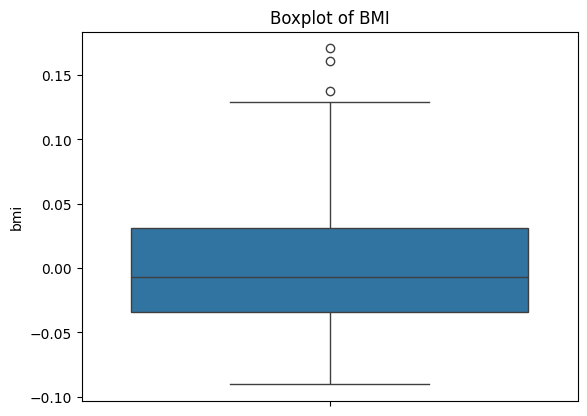

In [82]:
sns.boxplot(df_diabetics['bmi'])
plt.title('Boxplot of BMI')
plt.show()

##  Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

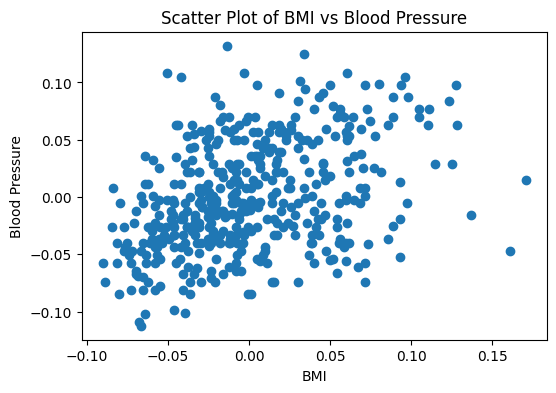

In [83]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_diabetics['bmi'], df_diabetics['bp'])
ax.set_xlabel('BMI')
ax.set_ylabel('Blood Pressure')
plt.title('Scatter Plot of BMI vs Blood Pressure')
plt.show()

##  Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation

In [84]:
z = np.abs(stats.zscore(df_diabetics['age']))
display(z)

array([0.80050009, 0.03956713, 1.79330681, 1.87244107, 0.11317236,
       1.94881082, 0.9560041 , 1.33508832, 0.87686984, 1.49059233,
       2.02518057, 0.57139085, 0.34228161, 0.11317236, 0.95323959,
       1.1087436 , 0.11593688, 1.48782782, 0.80326461, 0.57415536,
       1.03237385, 1.79607132, 1.79607132, 0.95323959, 1.33785284,
       1.41422259, 2.25428981, 0.49778562, 1.10597908, 1.41145807,
       1.26148309, 0.49778562, 0.72413034, 0.6477606 , 0.34228161,
       1.02960933, 0.26591186, 0.19230663, 0.03956713, 0.03956713,
       0.11317236, 2.10155031, 1.26148309, 0.41865135, 0.95323959,
       0.57139085, 1.18511334, 1.64333183, 1.41145807, 0.87963435,
       0.72413034, 1.25871858, 1.1087436 , 0.19230663, 1.03237385,
       0.87963435, 0.87963435, 0.57415536, 0.87686984, 1.33508832,
       1.49059233, 0.87963435, 0.57415536, 0.72689486, 1.41145807,
       0.9560041 , 0.19230663, 0.87686984, 0.80050009, 0.34228161,
       0.03956713, 0.03956713, 1.33508832, 0.26591186, 0.26591

Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [85]:
threshold_z = 2

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df_diabetics.drop(outlier_indices)
print("Original DataFrame Shape:", df_diabetics.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (442, 10)
DataFrame Shape after Removing Outliers: (426, 10)


##  IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [86]:
Q1 = np.percentile(df_diabetics['bmi'], 25, method='midpoint')
Q3 = np.percentile(df_diabetics['bmi'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

0.06520763046978838


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
`upper = Q3 + 1.5 * IQR`   

`lower = Q1 - 1.5 * IQR`

In [87]:
upper = Q3+1.5*IQR
upper_array = np.array(df_diabetics['bmi'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

lower = Q1-1.5*IQR
lower_array = np.array(df_diabetics['bmi'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 0.12879000811776306
3
Lower Bound: -0.13204051376139045
0


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [88]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()

column_name = diabetes.feature_names
df_diabetes = pd.DataFrame(diabetes.data)
df_diabetes .columns = column_name
df_diabetes .head()
print("Old Shape: ", df_diabetes.shape)


Q1 = df_diabetes['bmi'].quantile(0.25)
Q3 = df_diabetes['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df_diabetes['bmi'] >= upper)[0]
lower_array = np.where(df_diabetes['bmi'] <= lower)[0]

df_diabetes.drop(index=upper_array, inplace=True)
df_diabetes.drop(index=lower_array, inplace=True)

print("New Shape: ", df_diabetes.shape)

Old Shape:  (442, 10)
New Shape:  (439, 10)
